# Bitcoin Trend Analysis : 

## 1. Load data using Pandas 

In [1]:
import pandas as pd

btc = pd.read_csv("data/btc_raw_data.csv")

This BTC data could be used to analyze long-term trends, volatility, or investment signals.

## 2. Explore data :

In [2]:
btc.shape

(4364, 4)

In [3]:
btc.columns

Index(['snapped_at', 'price', 'market_cap', 'total_volume'], dtype='object')

In [4]:
btc.dtypes

snapped_at       object
price           float64
market_cap      float64
total_volume    float64
dtype: object

In [5]:
btc.head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [6]:
btc.tail()

,snapped_at,price,market_cap,total_volume
4359,2025-04-06 00:00:00 UTC,83595.885502,1.656020e+12,1.491040e+10
4360,2025-04-07 00:00:00 UTC,78211.483582,1.555325e+12,3.614038e+10
4361,2025-04-08 00:00:00 UTC,79179.292268,1.581408e+12,8.290975e+10
4362,2025-04-09 00:00:00 UTC,76329.090356,1.515042e+12,4.781279e+10
4363,2025-04-10 00:00:00 UTC,82622.170295,1.640568e+12,8.740822e+10


In [7]:
highest_price = btc['price'].max()
highest_price_date = btc[btc['price'] == highest_price]['snapped_at'].values[0]
print(f"highest price was : {highest_price} in {highest_price_date}")

highest price was : 106182.2368201815 in 2025-01-22 00:00:00 UTC


## 3. Clean the data :

In [8]:
btc.isnull().sum() # for missing values

snapped_at      0
price           0
market_cap      1
total_volume    0
dtype: int64

In [9]:
btc[btc['market_cap'].isnull()]

,snapped_at,price,market_cap,total_volume
1433,2017-04-02 00:00:00 UTC,1098.068,NaN,8.023151e+07


we'll fill the missing value using interpolation

In [10]:
btc['market_cap'] = btc['market_cap'].interpolate()
btc.loc[1433]

snapped_at      2017-04-02 00:00:00 UTC
price                          1098.068
market_cap            18076367393.36203
total_volume            80231506.350677
Name: 1433, dtype: object

Let's compare before and after filling the missing value

In [11]:
btc.loc[1432:1434, 'market_cap']

1432    1.763483e+10
1433    1.807637e+10
1434    1.851790e+10
Name: market_cap, dtype: float64

In [12]:
btc.duplicated().sum() # for duplicated values

np.int64(0)

In [13]:
btc['snapped_at'] = pd.to_datetime(btc['snapped_at'].str.replace(" UTC", ""))

## 4. Feature Engineering

In [14]:
# moving average
btc['ma100'] = btc['price'].rolling(window=100).mean()
btc['ma30'] = btc['price'].rolling(window=30).mean()
btc['ma20'] = btc['price'].rolling(window=20).mean()
# daily % change
btc['daily_return'] = btc['price'].pct_change()
# volatility
btc['volatility'] = btc['price'].rolling(window=30).std()

In [15]:
# add rsi column to the dataframe
# Calculate price difference
delta = btc['price'].diff()

# Separate gains and losses
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

# Calculate rolling averages
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

# Calculate RS and RSI
rs = avg_gain / avg_loss
btc['rsi'] = 100 - (100 / (1 + rs))

## 5. Visualisation

C:\Users\godde\AppData\Local\Temp\ipykernel_15240\2526712771.py:29: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\godde\AppData\Local\Temp\ipykernel_15240\2526712771.py:29: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\godde\AppData\Local\Temp\ipykernel_15240\2526712771.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\godde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\godde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170

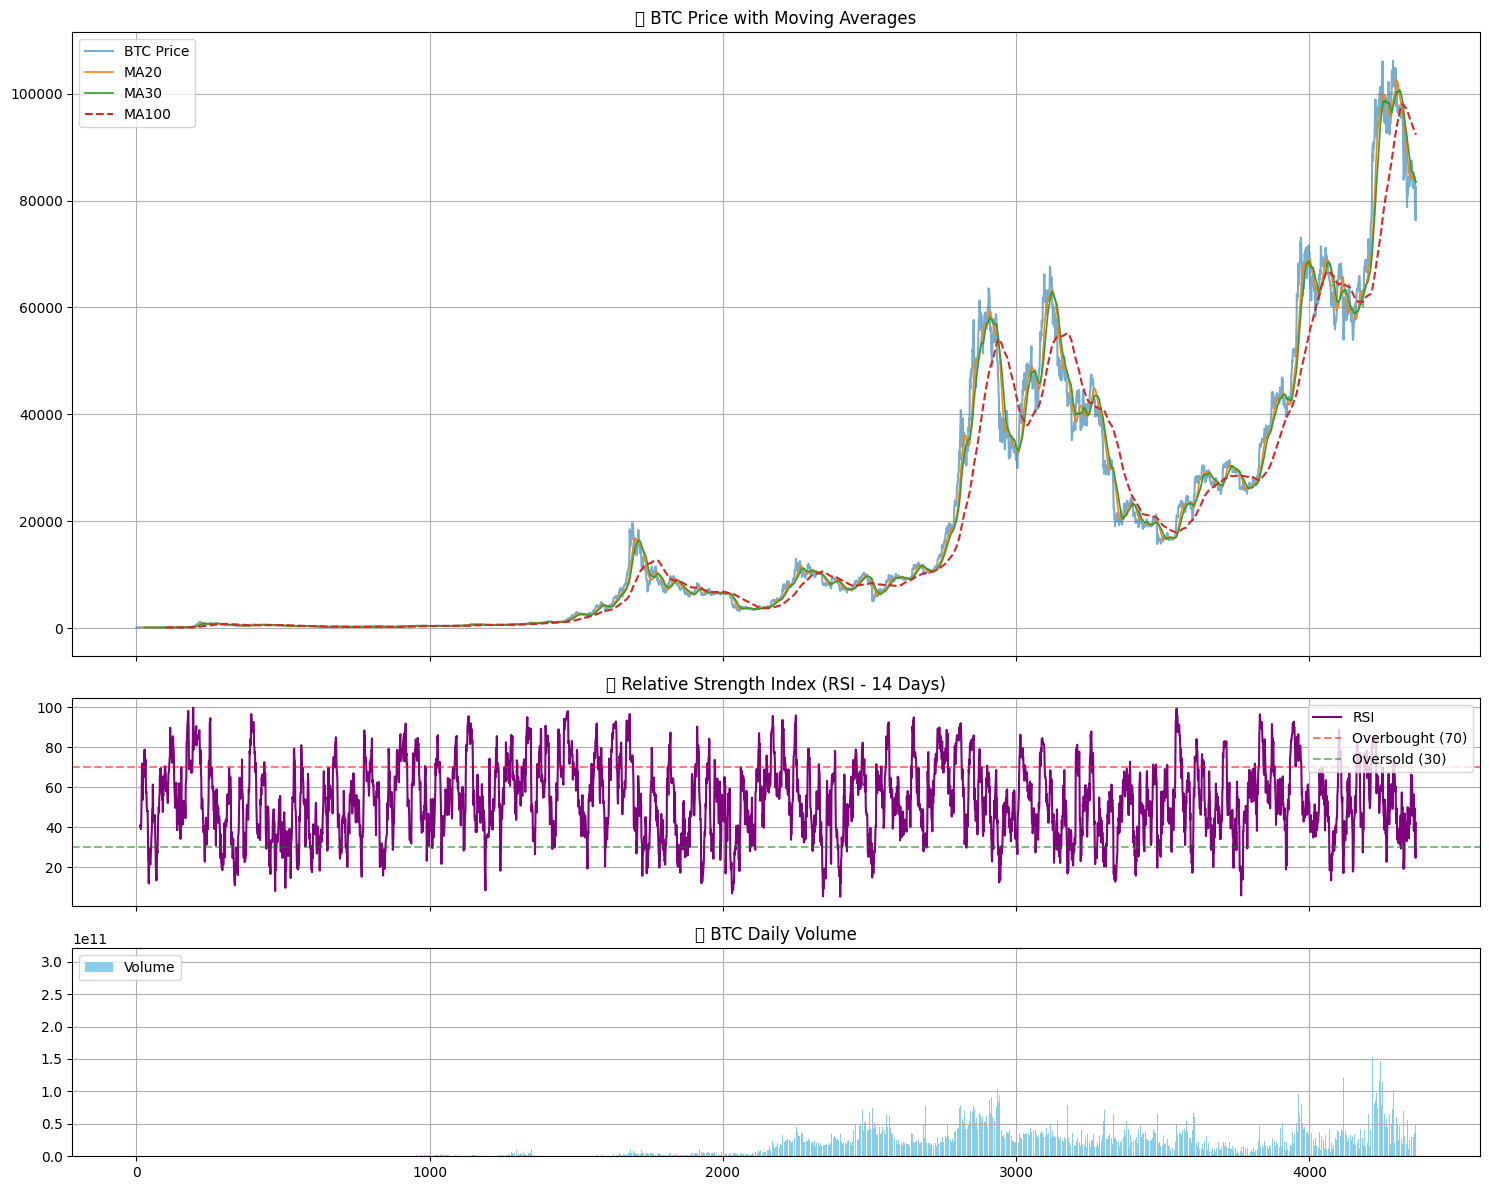

In [16]:
import matplotlib.pyplot as plt

# Create 3 stacked subplots
fig, axs = plt.subplots(3, 1, figsize=(15, 12), sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]})

# --- Plot 1: Price + Moving Averages ---
axs[0].plot(btc['price'], label='BTC Price', alpha=0.6)
axs[0].plot(btc['ma20'], label='MA20', linewidth=1.2)
axs[0].plot(btc['ma30'], label='MA30', linewidth=1.2)
axs[0].plot(btc['ma100'], label='MA100', linestyle='--', linewidth=1.5)
axs[0].set_title('📈 BTC Price with Moving Averages')
axs[0].legend()
axs[0].grid(True)

# --- Plot 2: RSI ---
axs[1].plot(btc['rsi'], color='purple', label='RSI')
axs[1].axhline(70, color='red', linestyle='--', alpha=0.5, label='Overbought (70)')
axs[1].axhline(30, color='green', linestyle='--', alpha=0.5, label='Oversold (30)')
axs[1].set_title('📉 Relative Strength Index (RSI - 14 Days)')
axs[1].legend()
axs[1].grid(True)

# --- Plot 3: Volume ---
axs[2].bar(btc.index, btc['total_volume'], color='skyblue', label='Volume')
axs[2].set_title('📊 BTC Daily Volume')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()
